# Optimal Hedged Least Square Monte Carlo Simulation

Author: Jerry Xia

Date: 2018/08/27

## 1. Introduction

This is a Python Notebook about an inovative method of the Monte Carlo simulation, Optimal Hedged Least Square Monte Carlo (OHLSMC) in order to price and hedge American type options. In this script, I implemented the following variance reduction methods as well as their antithetic variates' version:

* regular Monte Carlo
* least square Monte Carlo
* Monte Carlo with delta-based control variates
* optimal hedged Monte Carlo
* optimal hedged least square Monte Carlo

Due to the significant efficience and robustness, I mainly focus on the optimal hedged least square Monte Carlo (OHLSMC) in option pricing. We invoke this method to price American options and make comparison with the original least square monte carlo (LSM).

### 1.1 Facts
* The option price is not simply the average value of the discounted future pay-off over the objective (or historical) probability distribution
* The requirement of absence of arbitrage opportunities is equivalent to the existence of "risk-neutral measure", such that the price is indeed its average discounted future pay-off.
* Risk in option trading cannot be eliminated

### 1.2 Objective
* It would be satisfactory to have an option theory where the objective stochastic process of the underlying is used to calculate the option price, the hedge strategy and the *residual risk*.

### 1.3 Advantages
* It is a versatile methods to price complicated path-dependent options.
* Considerable variance reduction scheme for Monte Carlo
* It provide not only a numerical estimate of the option price, but also of the optimal hedge strategy and of the residual risk.
* This method does not rely on the notion of risk-neutral measure, and can be used to any model of the true dynamics of the underlying

## 2 Underlying dynamics

### Black-Scholes Model
$$dS = \mu S dt + \sigma S dW_t$$
$$log S_{t+1} = log S_t +(\mu - \frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t} \epsilon$$
where
$$\epsilon \sim N(0,1)$$
In risk neutral measure, $\mu = r - q$. 
### Heston Model
The basic Heston model assumes that $S_t$, the price of the asset, is determined by a stochastic process:
$$
dS_t = \mu S_t dt + \sqrt{v_t} S_t d W_t^S\\
dv_t = \kappa (\theta - v_t) dt + \xi \sqrt{v_t} d W_t^v
$$
where 
$$E[dW_t^S,dW_t^v]=\rho dt$$
In risk neutral measure, $\mu = r - q$. 

## 3 Methodology

### 3.1 Notations
Option price always requires to work backward. That is because the option price is known exactly at the maturity. As with other schemes, we determine the option price step by step from the maturity $t=K\tau=T$ to the present time $t=0$. The unit of time being $\tau$, for example, one day. We simulate $N$ trajectories. In trajectory i, the price of the underlying asset at time $k\tau$ is denoted as $S_k^{(i)}$. The price of the derivative at time $k\tau$ is denoted as $C_k$, and the hedge function is $H_k$. We define an optimal hedged portfolio as
$$W_k^{(i)} = C_k(S_k^{(i)}) + H_k(S_k^{(i)})S_k^{(i)}$$
The one-step change of our portfolio is
$$\Delta W_k^{(i)}= df(k,k+1) C_{k+1}(S_{k+1}^{(i)}) - C_k(S_k^{(i)}) + H_k(S_{k}^{(i)}) (df2(k,k+1) S_{k+1}^{(i)} - S_{k}^{(i)})$$
Where $df(k,k+1)$ is the discounted factor from time $k\tau$ to $(k+1) \tau$, $df2(k,k+1)$ is the discounted factor considering dividend $e^{-(r-q)(t_{k+1}-t_k)}$

### 3.2 Objective
The optimal hedged algorithm can be interpreted as the following optimal problem

\begin{align}
\mbox{minimize}\quad & \quad Var[\Delta W_k]\\
\mbox{subject to}\quad & \quad E[\Delta W_k]=0
\end{align}

It means we should try to minimize the realized volatility of hedged portfolio while maintaining the expected value of portfolio unchanged.

### 3.3 Basis Functions
The original optimization is very difficult to solve. Thus we assume a set of basis function and solved it in such subspace. We use $N_C$and $N_H$ to denote the number of basis functions for price and hedge.

\begin{align}
C_k(\cdot) &= \sum_{i=0}^{N_C} a_{k,i} A_i(\cdot)\\
H_k(\cdot) &= \sum_{i=0}^{N_H} b_{k,i} B_i(\cdot)
\end{align}

The basis functions $A_i$ and $B_i$ are priori determined and need not to be identical. The coefficients $a_i$ and $b_i$ can be calibrated by solving the optimal problem.

### 3.4 Numerical Solution

\begin{align}
\mbox{minimize}\quad & \quad \frac{1}{N} \sum_{i=1}^N \Delta W_k^{(i)2}\\
\mbox{subject to}\quad & \quad \frac{1}{N} \sum_{i=1}^N \Delta W_k^{(i)}=0
\end{align}

Denote the discounted forward underlying price change at time $k\tau$ as

$$\Delta S_k = df2(k,k+1) S_{k+1} - S_k$$

Define

\begin{align}
Q_k &= \begin{bmatrix}
    -A_{k,1}(S_k^{(1)}) & \cdots & -A_{k,N_C}(S_k^{(1)}) & B_{k,1}(S_k^{(1)})\Delta S_k^{(1)}& \cdots  & B_{k,N_H}(S_k^{(1)})\Delta S_k^{(1)} \\
    -A_{k,1}(S_k^{(2)}) & \cdots & -A_{k,N_C}(S_k^{(2)}) & B_{k,1}(S_k^{(2)})\Delta S_k^{(2)}& \cdots  & B_{k,N_H}(S_k^{(1)})\Delta S_k^{(2)} \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    -A_{k,1}(S_k^{(N)}) & \cdots & -A_{k,N_C}(S_k^{(N)}) & B_{k,1}(S_k^{(N)})\Delta S_k^{(N)}& \cdots  & B_{k,N_H}(S_k^{(N)})\Delta S_k^{(N)}
    \end{bmatrix}\\\\
c_k &= (a_{k,1}, \cdots a_{k,N_C}, b_{k,1}, \cdots, b_{k,N_H})^T\\\\
v_{k} &= df(k,k+1) C_{k+1}(S_{k+1}^{})
\end{align}

As for $v_k$, note that we know the exact value at maturity, which means there is no need to approximate price in terms of basis functions, that is

\begin{align}
v_k = \begin{cases}
df(N-1,N)\ payoff(S_N),\quad & k=N-1\\
df(k,k+1)\ \sum_{i=1}^{N_C} a_{k+1,i} A_i(S_{k+1}), \quad & 0<k<N-1\\
df(0,1)\ C_1(S_1), \quad & k=0
\end{cases}
\end{align}

Then, the optimization problem can be expressed as

\begin{align}
\arg\min_{c_k}\quad & \quad (v_{k} + Q_k c_k)^T (v_{k} + Q_k c_k)\\
\mbox{subject to}\quad & \quad 1_{[N\times1]}^T (v_{k}  + Q_k c_k)=0
\end{align}

In step k, since we already know the information ($v_{k}$) in step k+1. By canceling the constant term, the optimal problem can be simplified as the following 

\begin{align}
\arg\min_{c_k}\quad & \quad 2 v_{k}^T Q_k c_k + c_k^T Q_k^T Q_k c_k\\
\mbox{subject to}\quad & \quad 1_{[N\times1]}^T v_{k}  + 1_{[N\times1]}^T Q_k c_k=0
\end{align}

### 3.5 Convex Optimization Problem

Let us first review the standard form of linear constrained quadratic programming problem:

\begin{align}
    \min_{x} \quad & \frac{1}{2} x^T P x + q^T x\\
    \mbox{subject to} \quad &G x \preceq h\\
    &A x = b
\end{align}

Note that $x^T$ means the transpose of vector x, and $G x \preceq h$denotes the inequality is taken element-wise over the vectors $G x$ and $h$. The objective function is convex if and only if the matrix $P$ is positive-semidefinite(Hermitian matrix all of whose eigenvalues are nonnegative), which is the realm we concern with.

Recall that the constrained optimization problem:

\begin{align}
\arg\min_{c_k}\quad & \quad  v_{k}^T Q_k c_k + \frac{1}{2}c_k^T Q_k^T Q_k c_k\\
\mbox{subject to}\quad & \quad 1_{[N\times1]}^T v_{k}  + 1_{[N\times1]}^T Q_k c_k=0
\end{align}

Correspondingly, we make the connection by letting

\begin{align}
    x &= c_k\\
    P &= Q_k^T Q_k\\
    q &= Q_k^T v_k\\
    A &= 1_{[N\times1]}^T Q_k\\
    b &= -1_{[N\times1]}^T v_{k}
\end{align}

The hard work is almost over right now. As you would always find, formulating the problem is usually the hard step. Invoking a solver is straightforward.

Note that when $k=0$, the degree of freedom of the quadratic problem decreases to 2. Because here the only concerns are price and hedge at time zero (we don't need to project them into a high dimension space). Let $x=[C_0, H_0]^T$

\begin{align}
    Q_0 &= \begin{bmatrix}
    -1 & \Delta S_0^{(1)}\\
    \vdots & \vdots\\
    -1 & \Delta S_0^{(N)}
    \end{bmatrix}\\
    P &= Q_0^T Q_0\\
    q &= Q_0^T v_0\\
    A &= 1_{[N \times 1]}^T Q_0\\
    b &= -1_{[N \times 1]}^T v_0
\end{align}

## 4 Variance reduction and other methods
The rate of convergence of the Monte Carlo simulation is $O\left(\max \left( \Delta t, \frac{1}{N_x} \right)\right)$. The variance reduction techniques are used to reduce the constant factor corresponding to the Monte Carlo approximation $O \left(\frac{1}{N_x}\right)$. Some of the most used variance reduction techniques are:

* Control Variates
* Antithetic Variates
* Moment Matching

In this part we selected antithetic variates and delta-based control variates methods as a supplement to optimal hedged monte carlo simulation.

### 4.1 Antithetic variates
The main idea of this technique is to look at the asset equation that you aretrying to simulate:
$$d S_t^{(1)} = r S_t^{(1)} dt + \sigma S_t^{(1)} d W_t$$
and recognize that sinceztis a standard Brownian motion so will be−ztandthey will have the same exact distribution.  This means that the equation:
$$d S_t^{(2)} = r S_t^{(2)} dt - \sigma S_t^{(2)} d W_t$$
will also generate paths of the same asset.
The variance depends on the sign of the covariance of $payoff(S_t^{(1)})$ and $payoff(S_t^{(2)})$. It can increase the eventual variance or decrease it, both case do arise. One sufficient condition to insure variance reduction is the monotony of the payoff function. Then, when using both in the calculation of the final Monte Carlo value the variance of the estimate will be reduced.

### 4.2 Delta-based control variates
Delta hedging can be summarized succinctly in the following way:  Suppose that at time $t= 0$, we receive $C_0$ the price of an option that pays $C_T$ at time T.  The price of this option at any time $t$ is a function $C(t,S)$. Then, if we hold at any moment in time $\frac{\partial C}{\partial S}(t,S) = \frac{\partial C_t}{\partial S}$ units of stock, then we will be able to replicate the payout of this option $C_T$ at time T. This is in theory since of course we cannot trade continuously. So in practice we perform a partial hedge where we only rebalance at some discrete moments in time say $t_1,t_2,\cdots,t_N$. The replicating strategy can be expressed as follow:
$$W(t_i,S_i) = C(t_0,S_0) e^{r(t_i - t_0)} + \sum_{j=0}^{i} \Delta(t_j,S_j) ( S_{j+1} e^{-r(t_{j+1} - t_j )} - S_{j})e^{r(t_i - t_j)} = C(t_i,S_i)$$
which is similar to the strategy in the optimal hedged Monte Carlo simulation where the only difference is that in OHMC, we use option and delta hedging to replicate the cash flow and here we do the opposite operation. But when implementing the delta-based control variates, we should move the hedging term to the right hand side which make it identical to the OHMC strategy. Note that here we are assumed to know the delta hedging function. It explains a lot why OHMC can reduce the variance.

### 4.3 Optimal hedged Monte Carlo simulation
**In conclusion, OHMC is just a control variates method with an optimization on top and it is more practical because we do not have an analytical formula for the hedge sensitivity (i.e. delta, gamma, etc.)**

## OHMC couple with Least Square Monte Carlo (LSM)

In order to price Amrican type options, we need to consider the problem of optimal exercise. LSM is a well-defined method to tackle this problem. In contrast, here we only utilize the information of exercise points along each simulation path using cross-sectional regression. Different from the original LSM, here we equipe basis functions to approximate price and hedge at each step similar to OHMC. And discuss independently at the inception.

This combination create a magic reaction. Now we can not only price the American options but also hedge it! Moreover, it's model independent, model parameters or construction, dimension doesn't matter at all! We use Black-Scholes and Heston model as examples. What only matters is the underlying price trials. With it, we can calculate the following stuffs.

* American options price
* American options Greeks
* American options optimal exercise boundary

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
from cvxopt import matrix, solvers
import binomial

In [2]:
risk_free_rate = 0.02
dividend = 0.0
time_to_maturity = 1
volatility = 0.3
strike = 100
stock_price = 100
n_trials = 200
n_steps = 20
func_list = [lambda x: x**0, lambda x: x] # basis for OHMC part
option_type = 'p'

In [3]:
binomial.put(S=stock_price, K=strike, sigma=volatility, r=risk_free_rate,
             t=time_to_maturity, div=dividend, n=100, am=True)

10.993769061633683

In [4]:
binomial.put(S=stock_price, K=strike, sigma=volatility, r=risk_free_rate,
             t=time_to_maturity, div=dividend, n=100, am=False)

10.811910510378405

In [5]:
from MonteCarlo import MonteCarlo

In [6]:
mc = MonteCarlo(stock_price,strike,time_to_maturity,risk_free_rate,dividend,volatility)

In [7]:
mc.BlackScholesPricer(option_type=option_type) # BS formula for European options

10.841448723366952

In [8]:
price_matrix = mc.simulate(n_trials,n_steps)

In [9]:
a = np.zeros((2,5))
a[:,3:]

array([[ 0.,  0.],
       [ 0.,  0.]])

In [10]:
exercise_matrix = mc.LSM2(option_type=option_type,func_list=[lambda x: x**0, lambda x: x, lambda x:x**2])

/Users/xiayuxuan/Codes/MonteCarlo/MonteCarlo.py:216: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 201 but corresponding boolean dimension is 200
  b_prime_matrix = b_matrix[ITM_filter, :]
/Users/xiayuxuan/Codes/MonteCarlo/MonteCarlo.py:216: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 216 but corresponding boolean dimension is 200
  b_prime_matrix = b_matrix[ITM_filter, :]


In [11]:
exercise_steps = np.where(mc.exercise_matrix==1)[1]
exercise_prices = mc.price_matrix[mc.exercise_matrix]

In [23]:
mc.price_matrix[np.where(mc.exercise_matrix==1)]

array([  98.40400544,   92.56001326,   84.38821727,  108.24252564,
        125.34767247,  152.20973949,   59.72444952,   58.81051643,
        124.64241804,  139.70268595,  103.7957669 ,   91.35328601,
         89.94816261,   73.36406095,  129.50288345,  108.36109709,
        175.62211035,  179.50113455,   60.69476197,  140.71553726,
        123.25502652,  150.53714483,   83.48671234,  107.21550401,
         89.66522844,   65.44955603,  121.15647908,   73.36922669,
         90.7436368 ,  100.10870778,   80.87635431,   95.04817983,
         66.43211714,  128.19224369,  102.24051391,  116.93074028,
         84.69166386,   94.79928175,   88.64151299,  137.70941205,
         85.3825017 ,  113.54187927,   97.96106151,  108.23150093,
         82.56040124,   90.68265704,   81.93559877,   88.43903699,
         81.64142411,   66.11805063,  123.97941096,   95.65524271,
         89.37859548,  107.34095012,  101.21629335,  108.25262845,
        119.81861951,   90.7406792 ,  120.38078931,   82.72806

In [13]:
import matplotlib.pyplot as plt

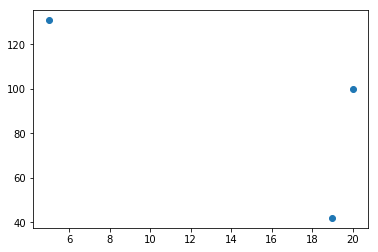

In [14]:
exercise_steps = np.where(mc.exercise_matrix==1)[1]
exercise_prices = mc.price_matrix[mc.exercise_matrix]
step_list = []
boundary_list = []
for i in range(1,n_steps+1):
    if (exercise_steps==i).any():
        step_list.append(i)
        boundary = exercise_prices[np.where(exercise_steps==i)].mean()
        boundary_list.append(boundary)
        
    
plt.scatter(step_list,boundary_list)
plt.show()

In [15]:
# import xlwings as xl
# xl.view(mc.price_matrix*mc.holding_matrix)

In [16]:
mc.MCPricer(option_type=option_type,isAmerican=True) # LSM for American options

9.5866516492250078

In [17]:
mc.MCPricer(option_type=option_type,isAmerican=False) # original MC for European options

9.8725852461595025

In [18]:
mc.american_values_matrix[0,0]

-0.0

In [19]:
mc.OHMCPricer(option_type=option_type,isAmerican=True) # OHLSM for American options

9.231248553954757

In [20]:
mc.OHMCPricer(option_type=option_type,isAmerican=False) # OHLSM for European options

9.406755892307462

In [21]:
(mc.price_matrix<0).any() # Sanity check

False

In [22]:
mc.holding_matrix

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)